In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

# loading data
df = pd.read_csv("/Users/maxwellpearse/Library/Mobile Documents/com~apple~CloudDocs/Life/b.Business, Money, Education,  Employment/Python/data_jobs.csv")

# cleaning data
df["job_posted_data"] = pd.to_datetime(df.job_posted_date)

In [2]:
df_usa = df[df["job_country"]== "United States"].copy() # Only countries from the united states
df_usa["job_posted_month"] = df_usa["job_posted_data"].dt.strftime("%B") #dt allows you to apply datetime functions to column
df_usa_pivot = df_usa.pivot_table(index="job_posted_month", columns="job_title_short", aggfunc="size")
df_usa_pivot.reset_index(inplace=True)
df_usa_pivot["month no"] = pd.to_datetime(df_usa_pivot["job_posted_month"],format="%B").dt.month
df_usa_pivot.sort_values("month no", inplace=True)
df_usa_pivot.set_index("job_posted_month", inplace=True)
df_usa_pivot.drop(columns="month no",inplace=True)

In [3]:
df_usa_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,527,36,8494,2655,6915,60,1544,773,1552,114
February,447,24,6124,3060,4956,56,1258,878,1127,90
March,438,19,6218,3183,4779,59,1114,829,1150,115
April,565,40,6049,2801,4867,51,1025,781,991,112
May,279,20,4993,2976,4377,49,839,746,914,90
June,446,32,5683,2893,4645,48,1009,812,1033,93
July,581,39,5201,2570,4876,65,883,747,1095,153
August,903,39,6634,3269,6318,68,1186,903,1515,194
September,897,50,4639,3224,4568,113,805,775,1014,228


In [4]:
df_usa_software_pivot = pd.read_csv("https://lukeb.co/software_csv", index_col="job_posted_month",) # where is it reading this from???

In [5]:
df_usa_merge = df_usa_pivot.merge(df_usa_software_pivot, on="job_posted_month")

In [ ]:
top5 = (     # this way it is easier to read
    df_usa_merge
    .sum()
    .sort_values(ascending=False)
    .head()
    .index # get the index of the top 5 this is an attribute at it is what something has
    .to_list() # this is a method as it is performing an action
) 

top5

['Front-End Developer',
 'Back-End Developer',
 'Full-Stack Developer',
 'Data Analyst',
 'Data Scientist']

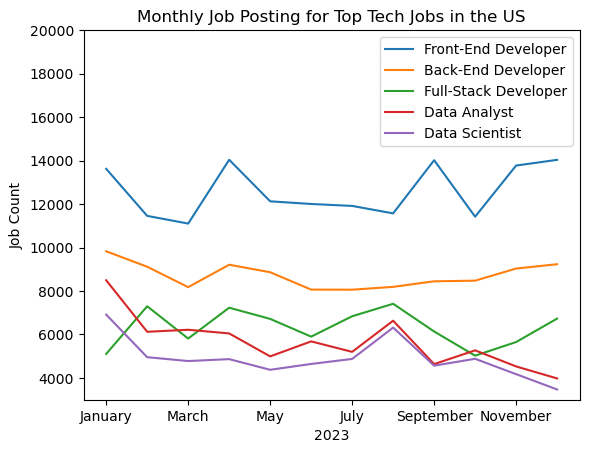

In [ ]:
df_usa_merge[top5].plot(kind="line")
plt.title("Monthly Job Posting for Top Tech Jobs in the US")
plt.xlabel("2023")
plt.ylabel("Job Count")
plt.ylim(3000,20000)
plt.legend()
plt.show()